In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/featureExtraction.pkl')


features = df[['features']].to_numpy()
all_labels = df[['labels']].to_numpy()

print(features)
all_features = []
for i in range(len(df)):
  all_features.append(features[i][0])

print(len(all_features))
print(all_features[0].shape)
print(all_labels.shape)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

tr_features, test_features, tr_labels, test_labels = train_test_split(
  all_features, all_labels, test_size=0.15, random_state=21, shuffle=True
)

train_features, val_features, train_labels, val_labels = train_test_split(
    tr_features, tr_labels, test_size=0.177, random_state=21, shuffle=True
)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

val_features = np.array(val_features)
val_labels = np.array(val_labels)

test_features = np.array(test_features)
test_labels = np.array(test_labels)

input_shape = train_features.shape[1]
print(input_shape)
print(len(train_features))
print(len(val_features))
print(len(test_features))


In [ ]:
from keras.utils import to_categorical

train_features = np.reshape(
    train_features, (train_features.shape[0], 1, train_features.shape[1]))
val_features = np.reshape(
    val_features, (val_features.shape[0], 1, val_features.shape[1]))
test_features = np.reshape(
    test_features, (test_features.shape[0], 1, test_features.shape[1]))

print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

train_labels = to_categorical(train_labels, num_classes=8)
val_labels = to_categorical(val_labels, num_classes=8)
test_labels = to_categorical(test_labels, num_classes=8)


print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Activation, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Bidirectional(LSTM(32, return_sequences=True),
          input_shape=(1, input_shape)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x=train_features, y=train_labels, batch_size=128, epochs=50, 
                    validation_data=(val_features, val_labels))


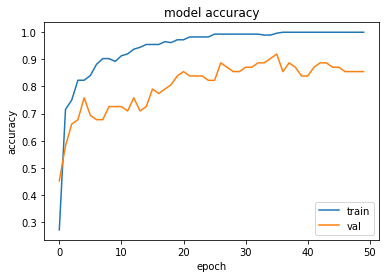

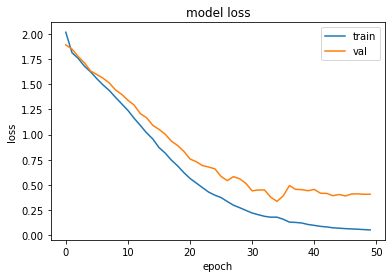

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_features, test_labels)
print("test loss, test acc:", results)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


predictions = model.predict(test_features)
predicted_labels = np.argmax(predictions, axis=-1)
Tlabels = np.argmax(test_labels, axis=-1)
y_predict = np.argmax(model.predict(test_features), axis=1)
# print(classification_report(Tlabels, y_predict))

label_dict = {
    'accident_Cropped': 0,
    'call_Cropped': 1,
    'doctor_Cropped': 2,
    'help_Cropped': 3,
    'hot_Cropped': 4,
    'lose_Cropped': 5,
    'pain_Cropped': 6,
    'thief_Cropped': 7,
}

# print([str(label_dict[i])+":"+str(label_dict[j]) for i,j in enumerate(Tlabels, predicted_labels)])

matrix_confusion = confusion_matrix(Tlabels, predicted_labels)
matrix_confusion

sns.heatmap(matrix_confusion.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True label") 
plt.ylabel("Predicted label")

print(classification_report(Tlabels, predicted_labels, target_names=['accident', 'call', 'doctor', 'help', 'hot', 'lose', 'pain', 'thief']))